In [11]:
import gym
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import time
import matplotlib.pyplot as plt

In [12]:
class qAgent:
    def __init__(self, n_action_space, n_observation_space, epsilon, alpha, discount_factor ):
        self.n_action_space = n_action_space
        self.n_observation_space = n_observation_space
        
        self.epsilon = epsilon
        self.alpha = alpha
        self.discount_factor = discount_factor
        
        self.q_table = np.zeros([n_observation_space, n_action_space])
        
    def get_q_value(self, state, action):
        return self.q_table[state][action]
    
    def set_q_value(self, state, action, value):
        self.q_table[state][action] = value
        
    def get_action_epsilon_greedy(self, state):    
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.n_action_space)
        else:
            action = self.get_best_action(state) # greedy policy 
        return action
    
    def get_best_action(self, state):
        best_action = [self.get_q_value(state,action) for action in range(self.n_action_space)]
        best_action = np.argmax(best_action)
        return best_action 
    
    def update_q_table(self, state, new_state, action, reward):
        # Q(S,A) = Q(S,A) + alpha[R + gamma*maxaQ(S',a)-Q(S,A)]
        
        value_new_state = self.get_q_value(new_state, self.get_best_action(new_state))
        
        new_q_value = self.get_q_value(state,action) +\
                self.alpha*(reward+self.discount_factor*value_new_state-self.get_q_value(state,action))
        
        #new_q_value = (1 - self.alpha)*self.get_q_value(state,action)+self.alpha*(reward+self.discount_factor*value_new_state)
        
        self.set_q_value(state, action, new_q_value)
        

In [13]:
# Load Taxi-v3 environment 
# https://gym.openai.com/envs/Taxi-v3/
env = gym.make('Taxi-v3')

In [14]:
"""
For this environment we have 6 actions and 500 discrete states.
https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py

Actions:
There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pickup passenger
- 5: dropoff passenger

Observations: 
    There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger 
    (including the case when the passenger is in the taxi), and 4 destination locations. 
"""

print("Number of possible actions:", env.action_space.n)
print("Number of possible states:", env.observation_space.n)

Number of possible actions: 6
Number of possible states: 500


In [15]:
# Hyperparameters
epsilon = 1
alpha = 0.5
discount_factor = 0.99

agent = qAgent(n_action_space=env.action_space.n,
               n_observation_space=env.observation_space.n,
               epsilon=epsilon,
               alpha=alpha,
               discount_factor=discount_factor)

In [16]:
def train(env, agent, n_episodes=20):
    rewards = []
    
    for ep in range(n_episodes):
        n_iter = 0
        state = env.reset()
        done = False
        ep_rewards = 0.0
        
        while not done:
            n_iter += 1
            action = agent.get_action_epsilon_greedy(state)
            
            new_state, reward, done, info = env.step(action)
            
            agent.update_q_table(state, new_state, action, reward)
            
            state = new_state
            ep_rewards += reward
            
        print("Ep {}\t done after {} iteractions\t epsilon={:.2f}".format(ep+1, n_iter, agent.epsilon))    
        agent.epsilon *= 0.95
        rewards.append(ep_rewards)
    env.close()
    return rewards

In [17]:
rewards = train(env, agent, n_episodes=1000)

Ep 1	 done after 148 iteractions	 epsilon=1.00
Ep 2	 done after 200 iteractions	 epsilon=0.95
Ep 3	 done after 200 iteractions	 epsilon=0.90
Ep 4	 done after 200 iteractions	 epsilon=0.86
Ep 5	 done after 200 iteractions	 epsilon=0.81
Ep 6	 done after 200 iteractions	 epsilon=0.77
Ep 7	 done after 200 iteractions	 epsilon=0.74
Ep 8	 done after 200 iteractions	 epsilon=0.70
Ep 9	 done after 200 iteractions	 epsilon=0.66
Ep 10	 done after 200 iteractions	 epsilon=0.63
Ep 11	 done after 200 iteractions	 epsilon=0.60
Ep 12	 done after 200 iteractions	 epsilon=0.57
Ep 13	 done after 200 iteractions	 epsilon=0.54
Ep 14	 done after 200 iteractions	 epsilon=0.51
Ep 15	 done after 200 iteractions	 epsilon=0.49
Ep 16	 done after 200 iteractions	 epsilon=0.46
Ep 17	 done after 200 iteractions	 epsilon=0.44
Ep 18	 done after 200 iteractions	 epsilon=0.42
Ep 19	 done after 200 iteractions	 epsilon=0.40
Ep 20	 done after 200 iteractions	 epsilon=0.38
Ep 21	 done after 200 iteractions	 epsilon=0.36
E

Ep 258	 done after 48 iteractions	 epsilon=0.00
Ep 259	 done after 10 iteractions	 epsilon=0.00
Ep 260	 done after 21 iteractions	 epsilon=0.00
Ep 261	 done after 17 iteractions	 epsilon=0.00
Ep 262	 done after 9 iteractions	 epsilon=0.00
Ep 263	 done after 33 iteractions	 epsilon=0.00
Ep 264	 done after 9 iteractions	 epsilon=0.00
Ep 265	 done after 18 iteractions	 epsilon=0.00
Ep 266	 done after 11 iteractions	 epsilon=0.00
Ep 267	 done after 10 iteractions	 epsilon=0.00
Ep 268	 done after 24 iteractions	 epsilon=0.00
Ep 269	 done after 27 iteractions	 epsilon=0.00
Ep 270	 done after 28 iteractions	 epsilon=0.00
Ep 271	 done after 16 iteractions	 epsilon=0.00
Ep 272	 done after 8 iteractions	 epsilon=0.00
Ep 273	 done after 11 iteractions	 epsilon=0.00
Ep 274	 done after 25 iteractions	 epsilon=0.00
Ep 275	 done after 11 iteractions	 epsilon=0.00
Ep 276	 done after 16 iteractions	 epsilon=0.00
Ep 277	 done after 12 iteractions	 epsilon=0.00
Ep 278	 done after 29 iteractions	 epsilon=

Ep 617	 done after 12 iteractions	 epsilon=0.00
Ep 618	 done after 13 iteractions	 epsilon=0.00
Ep 619	 done after 15 iteractions	 epsilon=0.00
Ep 620	 done after 10 iteractions	 epsilon=0.00
Ep 621	 done after 13 iteractions	 epsilon=0.00
Ep 622	 done after 21 iteractions	 epsilon=0.00
Ep 623	 done after 10 iteractions	 epsilon=0.00
Ep 624	 done after 15 iteractions	 epsilon=0.00
Ep 625	 done after 16 iteractions	 epsilon=0.00
Ep 626	 done after 16 iteractions	 epsilon=0.00
Ep 627	 done after 16 iteractions	 epsilon=0.00
Ep 628	 done after 16 iteractions	 epsilon=0.00
Ep 629	 done after 15 iteractions	 epsilon=0.00
Ep 630	 done after 12 iteractions	 epsilon=0.00
Ep 631	 done after 16 iteractions	 epsilon=0.00
Ep 632	 done after 14 iteractions	 epsilon=0.00
Ep 633	 done after 16 iteractions	 epsilon=0.00
Ep 634	 done after 10 iteractions	 epsilon=0.00
Ep 635	 done after 16 iteractions	 epsilon=0.00
Ep 636	 done after 7 iteractions	 epsilon=0.00
Ep 637	 done after 14 iteractions	 epsilo

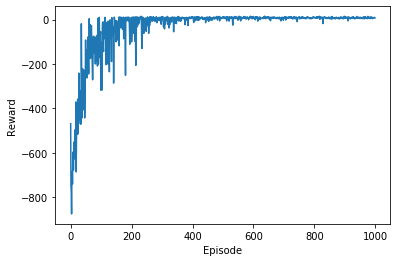

In [18]:
# Plot rewards x episode

plt.plot(rewards)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()       

In [19]:
def visualise_agent(policy, n_episodes=5):
    for ep in range(n_episodes):
        done = False
        n_iter = 0
        observation = env.reset()
        ep_reward = 0.0
        while not done:
            env.render()
            action = policy(observation)
            observation, reward, done, _ = env.step(action)
            time.sleep(0.5)
            ep_reward += reward
            n_iter += 1
        print("Ep {}, finished after {} timesteps, total reward={:.2f}".format(ep+1, n_iter, ep_reward))
        agent.epsilon *= 0.95
        print()
    env.close()

In [20]:
visualise_agent(agent.get_best_action, n_episodes=2)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |